In [5]:
from traitlets.config.manager import BaseJSONConfigManager
# To make this work, replace path with your own:
# On the command line, type juypter --paths to see where your nbconfig is stored
# Should be in the environment in which you install reveal.js
path = " /Users/Blake/.virtualenvs/cme193/bin/../etc/jupyter"
cm = BaseJSONConfigManager(config_dir=path)
cm.update('livereveal', {
              'theme': 'simple',
              'transition': 'zoom',
              'start_slideshow_at': 'selected',
    })

{'start_slideshow_at': 'selected', 'theme': 'simple', 'transition': 'zoom'}

### %%HTML 
<link rel="stylesheet" type="text/css" href="custom.css">

# CME 193 
## Introduction to Scientific Python
## Spring 2018

<br>

## Lecture 5
-------------
## NumPy and Matplotlib

# Lecture 5 Contents

* NumPy
* Matplotlib

---

# Administration

- Homework 1 due tomorrow, Friday 4/20 at 5pm
- Homework 2 and project description out this weekend
- Project proposals due next 4/30
Questions?

# NumPy

# NumPy for numerical computing

> NumPy is the fundamental package for scientific computing with Python. It
> contains among other things:
>
> * a powerful N-dimensional array object
> * sophisticated (broadcasting) functions
> * tools for integrating C/C++ and Fortran code
> * useful linear algebra, Fourier transform, and random number capabilities
>
> Besides its obvious scientific uses, NumPy can also be used as an efficient
> multi-dimensional container of generic data. Arbitrary data-types can be
> defined. This allows NumPy to seamlessly and speedily integrate with a wide
> variety of databases.

(From <http://www.numpy.org/>)

### Numpy Reference Documentation

Version 1.12 released January 16th, 2017

References and documentation:

- [User Guide][user-guide]
- [Reference][reference]
- [NumPy Routines][routines]
- [Numpy for Matlab users][matlab]

[reference]: https://docs.scipy.org/doc/numpy/reference/
[user-guide]: https://docs.scipy.org/doc/numpy/user/index.html

[routines]: https://docs.scipy.org/doc/numpy/reference/routines.html
[matlab]: https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html

### Numpy Reference documentation

* Central location: <http://docs.scipy.org/>

* Interactive help:

```python
np.array?
```

* Looking for something:

```python
np.lookfor('create array')
```

## Numpy arrays

Built-in **Python** objects:

* high-level number objects: integers, floating point
* containers: lists (costless insertion and append), dictionaries (fast lookup)

**Numpy** provides:

* extension package to Python for multi-dimensional arrays
* closer to hardware (efficiency)
* designed for scientific computation (convenience)
* Also known as *array oriented computing*
* Must be collection of “items” of the same type, much faster

In [2]:
import numpy as np
a = np.array([0, 1, 2, 3])
print(a)

[0 1 2 3]


## Numpy arrays

For example, an array containing:

* values of an experiment/simulation at discrete time steps
* signal recorded by a measurement device, e.g. sound wave
* pixels of an image, grey-level or colour
* 3-D data measured at different X-Y-Z positions, e.g. MRI scan
* ...

**Why it is useful:** Memory-efficient container that provides fast
numerical operations.

In [2]:
import numpy as np

# Note: np.random.normal(...)
# ----  creates a np array of Gaussian
# ----  random variables N(0,1)

N = 100000
L = np.random.normal(size=N)

%timeit -n 100 [i**2 for i in L]

a = np.arange(10000)
%timeit -n 100 a**2

31 ms ± 1.31 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.67 µs ± 189 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Import conventions

The recommended convention to import numpy is:

```python
import numpy as np
```


## Creating arrays

### Manual construction of arrays


* **1-D**

```python
a = np.array([0, 1, 2, 3]) # (4,) array

```


* **2-D**

```python
b = np.array([[0, 1, 2], [3, 4, 5]])    # 2 x 3 array

```


* **3-D**

```python
c = np.array([[[1], [2]], [[3], [4]]])

```

In [127]:
# https://docs.python.org/dev/tutorial/controlflow.html#arbitrary-argument-lists
def print_info(*M):
    for m in M:
        print("Matrix: \n", m)
        print("-- dimensions: ", m.ndim)
        print("-- shape: ", m.shape)
        print("-- length: ", len(m))
        print("-"*16+"\n")

a = np.array([0, 1, 2, 3])
b = np.array([[0, 1, 2], [3, 4, 5]])    # 2 x 3 array
c = np.array([[[1], [2]], [[3], [4]]])
print_info(a,b)

Matrix: 
 [0 1 2 3]
-- dimensions:  1
-- shape:  (4,)
-- length:  4
----------------

Matrix: 
 [[0 1 2]
 [3 4 5]]
-- dimensions:  2
-- shape:  (2, 3)
-- length:  2
----------------



In [129]:
print_info(c)

Matrix: 
 [[[1]
  [2]]

 [[3]
  [4]]]
-- dimensions:  3
-- shape:  (2, 2, 1)
-- length:  2
----------------



## Functions for creating arrays

In practice, we rarely enter items one by one...

Evenly spaced:


In [3]:
a = np.arange(10) # 0 .. n-1  (!)
b = np.arange(1, 9, 2) # start, end (exclusive), step
print("a : {}".format(a))
print("b : {}".format(b))

a : [0 1 2 3 4 5 6 7 8 9]
b : [1 3 5 7]


or by number of points:

In [14]:
c = np.linspace(0, 1, num=6)   # start, end, num-points
d = np.linspace(0, 1, num=5, endpoint=False)
print("c: {}".format(c))
print("d : {}".format(d))

c: [ 0.   0.2  0.4  0.6  0.8  1. ]
d : [ 0.   0.2  0.4  0.6  0.8]


## Functions for creating arrays

- Use ```np.arange(...)``` when you know the bounds and the offset, but maybe not the number of points

- Use ```np.linspace(...)``` when you know the bounds and the number of points

See also: ```np.logspace(...)``` and others...
    
[Array Creation Routines][array-create]

[array-create]: https://docs.scipy.org/doc/numpy/reference/routines.array-creation.html

In [16]:
a = np.arange(10) # 0 .. n-1  (!)
b = np.arange(1, 9, 2) # start, end (exclusive), step
print(a)
print(b, "\n")

c = np.linspace(0, 1, 6)   # start, end, num-points
d = np.linspace(0, 1, 5, endpoint=False)
print(c)
print(d)

[0 1 2 3 4 5 6 7 8 9]
[1 3 5 7] 

[ 0.   0.2  0.4  0.6  0.8  1. ]
[ 0.   0.2  0.4  0.6  0.8]


## Some common arrays

```python
# All 1
a = np.ones((3, 3))  # reminder: (3, 3) is a tuple

# All 0
b = np.zeros((2, 2))

# Identity matrix 3x3
c = np.eye(3)

# Diagonal entry only
d = np.diag(np.array([1, 2, 3, 4]))
```

In [4]:
a = np.ones((3, 3))

b = np.zeros((2, 2))

c = np.eye(3)

d = np.diag(np.array([1, 2, 3, 4]))

print(a, "\n")
print(b, "\n")
print(c, "\n")
print(d, "\n")

[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]] 

[[ 0.  0.]
 [ 0.  0.]] 

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]] 

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]] 



## `np.random`: 
### random numbers:

```python
a = np.random.rand(4)       # uniform in [0, 1]
>>> [0.74815744,  0.60962367,  0.20335453,  0.65363085]

b = np.random.randn(4)      # Gaussian
>>> [0.83999837,  0.36827404, -0.47327954,  1.170188]

np.random.seed(1234)        # Sets random seed, returns None
```

## Basic data types

You may have noticed that, in some instances, array elements are displayed with
a trailing dot (e.g. `2.` vs `2`). This is due to a difference in the data-type
used:

In [19]:
a = np.array([1, 2, 3])
print(a.dtype)

b = np.array([1., 2., 3.])
print(b.dtype)

int64
float64


## Basic data types
Different data-types allow us to store data more compactly in memory, but most
of the time we simply work with floating point numbers. 

Note that, in the
example above, NumPy auto-detects the data-type from the input.

You can explicitly specify which data-type you want:


In [20]:
c = np.array([1, 2, 3], dtype=float)
print(type(c))
print(c.dtype)

<class 'numpy.ndarray'>
float64


The **default** data type is floating point:


In [130]:
a = np.ones((3, 3))
print(a.dtype)
f = np.array(['Bonjour', 'Hello', 'Hallo',])
print(f.dtype)     # <--- strings containing max. 7 letters

float64
<U7


dtype('<U7')

## Other data types:

### Complex

```python
d = np.array([1+2j, 3+4j, 5+6*1j])
d.dtype
>>> dtype('complex128')

```

### Bool

```python
e = np.array([True, False, False, True])
e.dtype
>>> dtype('bool')
```

## Other data types:

### Strings

```python
f = np.array(['Bonjour', 'Hello', 'Hallo',])
f.dtype     # <--- strings containing max. 7 letters
>>> dtype('S7')

```

#### Much more

* `int32`
* `int64`
* `uint32`
* `uint64`




# Slicing and indexing


In [24]:
x = [[0,1], [2,3], [3,4]]
y = np.array(x)
print("Shape of array is {}".format(y.shape))
print("First row first column {}".format(y[0,0]))
print("First row {}".format(y[0,:]))
print("First column {}".format(y[:,0]))
print("last column {}".format(y[:,-1]))

Shape of array is (3, 2)
First row first column 0
First row [0 1]
First column [0 2 3]
last column [1 3 4]


In [25]:
x = [[[0,0,0], [1,1,1]],[[2,2,2], [3,3,3]], [[4,4,4], [5,5,5]], [[6,6,6], [7,7,7]]]
y = np.array(x)
print(y.shape) # find shape
print(y[0])# first of z dimension
print(y[1,0,:]) # second of z dimension first row 
print(y[1,:,-1]) # second of z dimension  last column

(4, 2, 3)
[[0 0 0]
 [1 1 1]]
[2 2 2]
[2 3]


## Basic visualization

Now that we have our first data arrays, we are going to visualize them.

*Matplotlib* is a 2D plotting package. We can import its functions as
below:

```python
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
```

The `inline` is important for the notebook, so that plots are displayed
in the notebook and not in a new window.

And then use (note that you have to use `show` explicitly if you have
not enabled interactive plots with `%matplotlib`)

#### More on *Matplotlib* shortly.

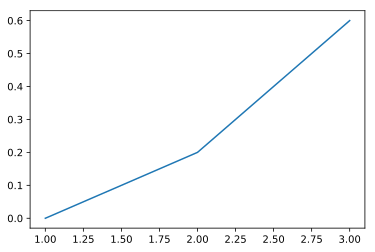

In [22]:
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'


plt.plot([1.0, 2.0, 3.0], [0.0, 0.2, 0.6])

# plt.show() # <- needed if attempting to plot from script or interpreter

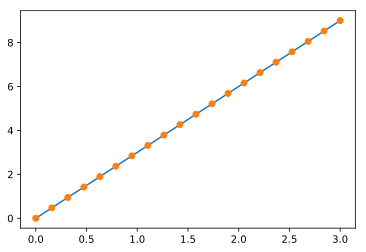

In [27]:
# * **1D plotting**:

x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)       # line plot
_ = plt.plot(x, y, 'o')  # dot plot

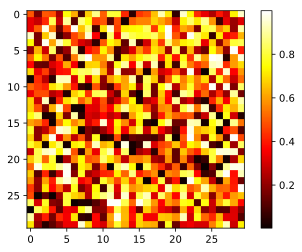

In [28]:
#* **2D arrays** (such as images):

image = np.random.rand(30, 30)
plt.imshow(image, cmap=plt.cm.hot)
_ = plt.colorbar()

## Numpy Indexing and slicing

The items of an array can be accessed and assigned to the same way as other
Python sequences (e.g. lists):


In [29]:
a = np.arange(10)
print(a)
a[0], a[2], a[-1]

[0 1 2 3 4 5 6 7 8 9]


(0, 2, 9)

Indices begin at `0`, like other Python sequences (and C/C++). In contrast, in
Fortran or Matlab, indices begin at `1`.
The usual python idiom for reversing a sequence is supported:

In [31]:
# reverse sequence
# slice [i:j:k] 
# Negative i, j interpreted as n + i and n + j where n is the number of elements in the corresponding dimension.
# Negative k makes stepping go towards smaller indices.
print(a[::-1])
print(a[:2:-2])

[9 8 7 6 5 4 3 2 1 0]
[9 7 5 3]


## Multidimensional indexing and slicing 
For multidimensional arrays, indexes are tuples of integers:

```python
a = np.diag(np.arange(3))
print(a)
print(a[1, 1])
```

```python
a[2, 1] = 10 # third line, second column
print(a)
```

```python
print(a[1])
```

In [33]:
a = np.diag(np.arange(3))
print(a)
print(a[1, 1])
a[2, 1] = 10 # third line, second column
print(a[1])

[[0 0 0]
 [0 1 0]
 [0 0 2]]
1
[0 1 0]



## Notes
### Indexing and slicing

* In 2D, the first dimension corresponds to **rows**, the second to **columns**.

* for multidimensional `a`, `a[0]` is interpreted by taking all elements in the
  unspecified dimensions.

**Slicing**: Arrays, like other Python sequences can also be sliced:


In [131]:
a = np.diag(np.arange(10))
print(a[2:9:3]) # [start:end:step]
print("-"*50)
#Note that the last index is not included:
print(a[:4])
print("-"*50)

[[0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0]]
--------------------------------------------------
[[0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]]
--------------------------------------------------


In [132]:
#All three slice components are not required: by default, start is 0, end is the
#last and step is 1:
print(a[1:3], a[::2], a[3:], sep = '\n' + '-'*50 + '\n')

[[0 1 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]]
--------------------------------------------------
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 6 0 0 0]
 [0 0 0 0 0 0 0 0 8 0]]
--------------------------------------------------
[[0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 6 0 0 0]
 [0 0 0 0 0 0 0 7 0 0]
 [0 0 0 0 0 0 0 0 8 0]
 [0 0 0 0 0 0 0 0 0 9]]



A small illustrated summary of Numpy indexing and slicing...

![image](../Data/11-fig/numpy_indexing.png)


## Assigning slices

You can also combine assignment and slicing:

```python
a = np.arange(10)
a[5:] = 10
print(a)
```

```python
b = np.arange(5)
a[5:] = b[::-1]
print(a)
```

In [35]:
a = np.arange(10)
a[5:] = 10
print(a)

b = np.arange(5)
a[5:] = b[::-1]
print(a)

[ 0  1  2  3  4 10 10 10 10 10]
[0 1 2 3 4 4 3 2 1 0]


## Copies and views

A slicing operation creates a **view** on the original array, which is just a
way of accessing array data. Thus the original array is not copied in memory.
You can use `np.may_share_memory()` to check if two arrays share the same memory
block. Note however, that this uses heuristics and may give you false positives.

**When modifying the view, the original array is modified as well**:

This behavior can be surprising at first sight... but it allows to save both
memory and time.

In [37]:
a = np.arange(10)
print("a:",a)
b = a[::2] # Get entries at even indices
print("b:", b)
print(np.may_share_memory(a, b), "\n")


b[0] = 12
print(b)
print(a, "\n")

a = np.arange(10)
c = a[::2].copy()  # force a copy
c[0] = 12
print(a)
print(np.may_share_memory(a, c))

a: [0 1 2 3 4 5 6 7 8 9]
b: [0 2 4 6 8]
True 

[12  2  4  6  8]
[12  1  2  3  4  5  6  7  8  9] 

[0 1 2 3 4 5 6 7 8 9]
False


## Fancy indexing

- Numpy arrays can be indexed with slices, but also with boolean or integer arrays
(**masks**). 
- This method is called *fancy indexing*. It creates **copies not
views**.

- Indexing with a mask can be very useful to assign a new value to a sub-array
### Using boolean masks

```python
np.random.seed(3)
a = np.random.randint(0, 20, 15)

mask = (a % 3 == 0)
extract_from_a = a[mask] # or,  a[a%3==0]
extract_from_a
```



In [10]:
np.random.seed(3)

a = np.random.randint(0, 20, 15) # low, high, size
print(a)

mask = a % 3 == 0

extract_from_a = a[mask]
print(extract_from_a, "\n")

a[a % 3 == 0] = -1
print(a)

[10  3  8  0 19 10 11  9 10  6  0 12  7 14 17]
[ 3  0  9  6  0 12] 

[10 -1  8 -1 19 10 11 -1 10 -1 -1 -1  7 14 17]


### Indexing with an array of integers

```python
a = np.arange(0, 100, 10)
```

Indexing can be done with an array of integers, where the same index is repeated
several time:

In [41]:
a = np.arange(0, 100, 10)
a[[2, 3, 2, 4, 2]]  # note: [2, 3, 2, 4, 2] is a Python list

array([20, 30, 20, 40, 20])

New values can be assigned with this kind of indexing:

In [42]:
a[[9, 7]] = -100
print(a)

[   0   10   20   30   40   50   60 -100   80 -100]


When a new array is created by indexing with an array of integers, the new array has the same shape than the array of integers:

In [11]:
a = np.arange(10, 20)
idx = np.array([[3, 4], [9, 7]])
print(idx.shape, "\n")
print(a[idx])

(2, 2) 

[[13 14]
 [19 17]]


The image below illustrates various fancy indexing applications

![img](../Data/11-fig/numpy_fancy_indexing.png)

# Numerical operations on Numpy arrays

```python
import numpy as np
```

## Elementwise operations

### Basic operations

In [45]:
## With scalars

a = np.array([1, 2, 3, 4])
print(a + 1)
print(2**a)


[2 3 4 5]
[ 2  4  8 16]


In [47]:
## All arithmetic operates elementwise:
b = np.ones(4) + 1
print("B is {}".format(b))
print("a - b is {}".format(a - b))

print("a * b is {}".format(a*b))


j = np.arange(5)
tmp = 2**(j + 1) - j
print("2*(j + 1) - j is {}".format(tmp))

B is [ 2.  2.  2.  2.]
a - b is [-1.  0.  1.  2.]
a * b is [ 2.  4.  6.  8.]
2*(j + 1) - j is [ 2  3  6 13 28]


## Elementwise operations

### Basic operations

These operations are of course much faster than if you did them in pure python:


In [49]:

a = np.arange(10000)
%timeit a + 1

l = range(10000)
%timeit [i+1 for i in l]



6.01 µs ± 149 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
635 µs ± 12 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Matrix operations

In [50]:
# Hadamard Product (element wise)
c = np.ones((3, 3))
print(c * c)
# Matrix operations
print(c.dot(c))


[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]
[[ 3.  3.  3.]
 [ 3.  3.  3.]
 [ 3.  3.  3.]]


### Comparisons

```python
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
a == b
```

```python
a > b
```

In [52]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
print(a == b)
print(a > b)

[False  True False  True]
[False False  True False]


### Array-wise comparisons


In [53]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
c = np.array([1, 2, 3, 4])
print(np.array_equal(a, b))
print(np.array_equal(a, c))

False
True


### Logical operations

In [54]:
a = np.array([1, 1, 0, 0], dtype=bool)
b = np.array([1, 0, 1, 0], dtype=bool)
print(np.logical_or(a, b))
print(np.logical_and(a, b))

[ True  True  True False]
[ True False False False]


### Transcendental functions


In [55]:
a = np.arange(1,5)
print(np.sin(a))
print(np.log(a))
print(np.exp(a))


[ 0.84147098  0.90929743  0.14112001 -0.7568025 ]
[ 0.          0.69314718  1.09861229  1.38629436]
[  2.71828183   7.3890561   20.08553692  54.59815003]


### Shape mismatches


In [57]:
a = np.arange(4)
a + np.array([1, 2])

ValueError: operands could not be broadcast together with shapes (4,) (2,) 

### Transposition

In [59]:
# Create an upper triangular matrix from an array
a = np.triu(np.ones((3, 3)), 1)
print(a)
print(a.T)

[[ 0.  1.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  0.]]
[[ 0.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  1.  0.]]


### Other operations

**The transposition is a view**

As a results, the following code **is wrong** and will **not make a
matrix symmetric**:

```python
a += a.T
```

It will work for small arrays (because of buffering) but fail for
large one, in unpredictable ways.

## ```numpy.linalg```

The sub-module `numpy.linalg` implements basic linear algebra, such as solving
linear systems, singular value decomposition, etc. However, it is not guaranteed
to be compiled using efficient routines, and thus we recommend the use of
`scipy.linalg`.

## Basic reductions

### Computing sums

In [12]:
x = np.array([1, 2, 3, 4])
print(x.shape)
print(np.sum(x))
print(x.sum())

(4,)
10
10



Sum by rows and by columns:

![image](../Data/11-fig/reductions.png)

In [63]:
# Examples
x = np.array([[1, 1], [2, 2]])
print("x is:\n {}".format(x))
print('-'*50)
print("Summing down the rows, yield cols: \n {}".format(x.sum(axis=0)))   # sum down the rows, columns (first dimension)
print('-'*50)
print("Sum down column 1: {}".format(x[:, 0].sum()), "Sum across row 1: {}".format(x[0, :].sum()), sep="\n")
print('-'*50)
print("Sum across columns, yield rows: {}".format(x.sum(axis=1)), "\n")   # rows (second dimension)

x is:
 [[1 1]
 [2 2]]
--------------------------------------------------
Summing down the rows, yield cols: 
 [3 3]
--------------------------------------------------
Sum down column 1: 3
Sum across row 1: 2
--------------------------------------------------
Sum across columns, yield rows: [2 4] 



In [66]:
# Same idea in higher dimensions
x = np.random.rand(2, 2, 2)
print(x)
print(x.sum(axis=2)[0, 1])
print(x[0, 1, :].sum())

[[[ 0.0206145   0.14271733]
  [ 0.32530618  0.8089292 ]]

 [[ 0.39899095  0.42470161]
  [ 0.41371868  0.7871385 ]]]
1.13423538766
1.13423538766


In [67]:
#Find minimum of address
x = np.array([1, 3, 2])
x.min()

1

## Other reductions

Such as `min` and `max`. Work the same way (and take `axis=`)

### Extrema

```python
x = np.array([1, 3, 2])
x.min()
x.max()
```

```python
x.argmin()  # index of minimum
x.argmax()  # index of maximum
```

In [68]:
a = np.array([1, 2, 3, 2])
b = np.array([2, 2, 3, 2])
c = np.array([6, 4, 4, 5])
((a <= b) & (b <= c)).all()

True

### Logical operations


In [69]:
print(np.all([True, True, False]))#False
print(np.any([True, True, False])) #True

False
True


Can be used for array comparisons:

In [7]:
a = np.zeros((100, 100))
print(np.any(a != 0))
print(np.all(a == 1))
a = np.array([1, 2, 3, 2])
b = np.array([2, 2, 3, 2])
c = np.array([6, 4, 4, 5])
print((((a <= b) & (b <= c)).all()))

False
False
True


### Statistics

```python
x = np.array([1, 2, 3, 1])
y = np.array([[1, 2, 3], [5, 6, 1]])
```
```python
x.mean()
np.mean(x)
```

```python
np.median(x)
```

```python
np.median(y, axis=-1) # last axis
```

```python
x.std()          # full population standard dev.
```

## Broadcasting

* Basic operations on `numpy` arrays (addition, etc.) are elementwise
* This works on arrays of the same size.

Nevertheless, It's also possible to do operations on arrays of different sizes
if *Numpy* can transform these arrays so that they all have the same size: this
conversion is called **broadcasting**.


The image below gives an example of broadcasting:

![broadcasting](../Data/11-fig/numpy_broadcasting.png)

## Broadcasting
Let's verify:


We have already used broadcasting without knowing it!:

In [71]:
a = np.ones((4, 5))
print(a.shape)
a[0] = 2  # we assign an array of dimension 0 to an array of dimension 1
print(a)

(4, 5)
[[ 2.  2.  2.  2.  2.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]


In [74]:
# np.tile(x, reps) reps is the number of repetitions of A along each axis
a = np.tile(np.arange(0, 40, 10), (3, 1)).T
print("A is: \n {} ".format(a))
print('-'*50)
b = np.array([0, 1, 2])
print("b is: \n {} ".format(b))
print('-'*50)
print("a + b is:\n {} ".format(a + b))
print('-'*50)
a = np.ones((4, 5))
a[0] = 2  # we assign an array of dimension 0 to an array of dimension 1
print(a)

A is: 
 [[ 0  0  0]
 [10 10 10]
 [20 20 20]
 [30 30 30]] 
--------------------------------------------------
b is: 
 [0 1 2] 
--------------------------------------------------
a + b is:
 [[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]] 
--------------------------------------------------
[[ 2.  2.  2.  2.  2.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]


## Broadcasting

A useful trick:

```python
a = np.arange(0, 40, 10)
a.shape
```

```python
a = a[:, np.newaxis]  # adds a new axis -> 2D array
a.shape
```

```python
a
```

```python
a + b
```

Broadcasting seems a bit magical, but it is actually quite natural to
use it when we want to solve a problem whose output data is an array
with more dimensions than input data.

In [76]:
a = np.arange(0, 40, 10)
print("a has shape: {}".format(a.shape))
print(a)
print('-'*50)
a = a[:, np.newaxis]  # adds a new axis -> 2D array
b = np.array([0, 1, 2])
print("a now has shape: {}".format(a.shape))
print(a)
print(('-'*50))
print("b now has shape: {}".format(b.shape))
print(b)
print('-'*50)
c = a + b
print("c  has shape: {}".format(c.shape))
print(c)

a has shape: (4,)
[ 0 10 20 30]
--------------------------------------------------
a now has shape: (4, 1)
[[ 0]
 [10]
 [20]
 [30]]
--------------------------------------------------
b now has shape: (3,)
[0 1 2]
--------------------------------------------------
c  has shape: (4, 3)
[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


## Array shape manipulation

### Flattening

- library-level function, returns a view of the raveled numpy array
```python 
np.ravel() ```

- Only acts on ndarray objects. Always returns a copy of the flattened numpy array
```python
np.flatten() ```


In [84]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = a.ravel()
print("a has shape {}".format(a.shape))
print(a)
print(('-'*50))
print("b has shape {}".format(b.shape))
print(b)
print('-'*50)


a has shape (2, 3)
[[1 2 3]
 [4 5 6]]
--------------------------------------------------
b has shape (6,)
[1 2 3 4 5 6]
--------------------------------------------------


Higher dimensions: last dimensions ravel out "first".

### Reshaping

The inverse operation to flattening:

In [81]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print("A has shape: {}".format(a.shape))
b = a.ravel()
print("B has shape: {}".format(b.shape))
b = b.reshape((2, 3))
print("B now has shape: {}".format(b.shape))
print(b) 
print("A now has shape: {}".format(a.shape))
print(a.ravel().reshape((2, -1))) # unspecified (-1) value is inferred

A has shape: (2, 3)
B has shape: (6,)
B now has shape: (2, 3)
[[1 2 3]
 [4 5 6]]
A now has shape: (2, 3)
[[1 2 3]
 [4 5 6]]


In [82]:
a = np.zeros((3, 2))
b = a.T.reshape(3*2)
b[0] = 9
print(a)
print(b)

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
[ 9.  0.  0.  0.  0.  0.]


## Reshaping 
**warning**

`ndarray.reshape` **may** return a view (cf `help(np.reshape)`)) or a copy!


```python
a = np.array([[1, 2, 3], [4, 5, 6]])
b = a.ravel()
b = b.reshape((2, 3))
b[0, 0] = 99
a

>>> array([[99,  2,  3],
       [ 4,  5,  6]])
```

## Reshaping
**warning**

Beware: reshape may also return a copy!:

```python
a = np.zeros((3, 2))
b = a.T.reshape(3*2)
b[0] = 9
a

>>> array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])
```

To understand this you need to learn more about the memory layout of a numpy
array.

In [86]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = a.ravel()
b = b.reshape((2, 3))
b[0, 0] = 99
print(a)
print(b)
print(('-'*50))
a = np.zeros((3, 2))
b = a.T.reshape(3*2)
b[0] = 9
print(a)
print(b)

[[99  2  3]
 [ 4  5  6]]
[[99  2  3]
 [ 4  5  6]]
--------------------------------------------------
[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
[ 9.  0.  0.  0.  0.  0.]


### Adding a dimension

Indexing with the `np.newaxis` object allows us to add an axis to an array (you
have seen this already above in the broadcasting section):

```python
z = np.array([1, 2, 3])
z
```

```python
print(z[:, np.newaxis])
print(z[np.newaxis, :])
```

Similarly, one can use

```python
np.expand_dims(a, axis)
```

to expand an array_like object ```a``` along int ```axis```.



### Dimension shuffling

In [91]:
# Reshaping
a = np.arange(4*3*2)
print(a, "\n")
a = a.reshape(4, 3, 2)
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] 

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]

 [[18 19]
  [20 21]
  [22 23]]]


In [92]:
e = a.transpose(1, 2, 0)
print((e.shape))
print((e[2, 1, 0]))

(3, 2, 4)
5


### Resizing

Size of an array can be changed with `ndarray.resize`:

```python
a = np.arange(4)
a.resize((8,))
a
>>> array([0, 1, 2, 3, 0, 0, 0, 0])
```

However, it must not be referred to somewhere else:

```python
b = a
a.resize((4,))
```
```>>> ValueError: cannot resize an array that references or is referenced
by another array in this way.  Use the resize function```


In [97]:
a = np.arange(4)
a.resize((8,2))
print(a)
b = a
a.resize((4,))

[[0 1]
 [2 3]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


ValueError: cannot resize an array that references or is referenced
by another array in this way.  Use the resize function

## Summary

**What do you need to know to get started?**

* Know how to create arrays : `array`, `arange`, `ones`, `zeros`.

* Know the shape of the array with `array.shape`, then use slicing to
  obtain different views of the array: `array[::2]`, etc. Adjust the
  shape of the array using `reshape` or flatten it with `ravel`.

* Obtain a subset of the elements of an array and/or modify their values with
  masks

```
a[a < 0] = 0
```

* Know miscellaneous operations on arrays, such as finding the mean or
  max (`array.max()`, `array.mean()`). No need to retain everything,
  but have the reflex to search in the documentation (online docs,
  `help()`, `lookfor()`)!!

* For advanced use: master the indexing with arrays of integers, as
  well as broadcasting. Know more Numpy functions to handle various
  array operations.

# Matplotlib

# Matplotlib

## Introduction

[Matplotlib](http://matplotlib.org/) is probably the single most used Python
package for 2D-graphics. It provides both a very quick way to visualize data
from Python and publication-quality figures in many formats. We are going to
explore matplotlib in interactive mode covering most common cases.

## Getting started with Jupyter Notebook

In the Jupyter notebook, we insert, **at the beginning of the notebook** the
following import statement and
[magic](http://ipython.readthedocs.org/en/stable/interactive/magics.html)
commands.

```python
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
```

* `%matplotlib inline` is an IPython magic command to display plots in the
   browser.
* `%config InlineBackend.figure_format = 'svg'` changes the backend to produce
   SVG images, which will likely look nicer thank PNG images.

## pyplot

`pyplot` provides a procedural interface to the matplotlib object-oriented
plotting library. It is modeled closely after Matlab. Therefore, the majority of
plotting commands in pyplot have Matlab™ analogs with similar arguments.
Important commands are explained with interactive examples.

## Simple plot

In this section, we want to draw the cosine and sine functions on the same plot.
Starting from the default settings, we'll enrich the figure step by step to make
it nicer.

First step is to get the data for the sine and cosine functions:

```python
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)
```

`X` is now a numpy array with 256 values ranging from $-\pi$ to $+\pi$
(included). `C` is the cosine (256 values) and `S` is the sine (256 values).

```python
plt.plot(X, C)
plt.plot(X, S)
plt.show()
```

Matplotlib documentation:
* [plot tutorial](http://matplotlib.org/users/pyplot_tutorial.html)
* [plot()
command](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)

## Instantiating defaults

Matplotlib comes with a set of default settings that allow customizing all kinds
of properties. You can control the defaults of almost every property in
matplotlib: 
- figure size and dpi
- line width
- color and style
- axes, axis and grid properties
- text and font properties and so on.

## Basics
In the script on the next slide, we've instantiated (and commented) all the figure settings
that influence the appearance of the plot.

The settings have been explicitly
set to their default values, but now you can play with the values
to explore their affect.

Matplotlib documentation:

* [Customizing matplotlib](http://matplotlib.org/users/customizing.html)

```python
# Create a figure of size 8x6 inches, 80 dots per inch
plt.figure(figsize=(8, 6), dpi=80)
# Create a new subplot from a grid of 1x1
plt.subplot(1, 1, 1)
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)
# Plot cosine with a blue continuous line of width 1 (pixels)
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-")
# Plot sine with a green continuous line of width 1 (pixels)
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-")
# Set x limits
plt.xlim(-4.0, 4.0)
# Set x ticks
plt.xticks(np.linspace(-4, 4, 9, endpoint=True))
# Set y limits
plt.ylim(-1.0, 1.0)
# Set y ticks
plt.yticks(np.linspace(-1, 1, 5, endpoint=True))
# Save figure using 72 dots per inch
# plt.savefig("exercice_2.png", dpi=72)
# Show result on screen
plt.show()
```

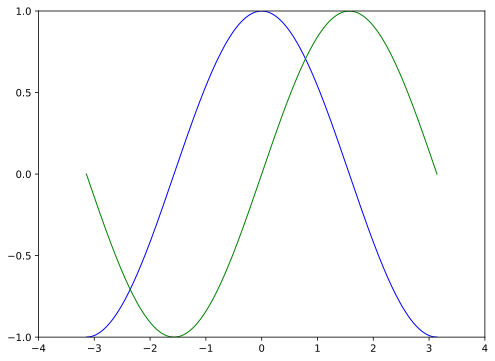

In [98]:
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-")
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-")
plt.xlim(-4.0, 4.0)
plt.xticks(np.linspace(-4, 4, 9, endpoint=True))
plt.ylim(-1.0, 1.0)
plt.yticks(np.linspace(-1, 1, 5, endpoint=True))
plt.savefig('../Data/11-fig/plot_first.png')

![image](../Data/11-fig/plot_first.png)

## Changing colors and line widths

First step, we want to have the cosine in blue and the sine in red and a slighty
thicker line for both of them. We'll also slightly alter the figure size to make
it more horizontal.

```python
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")
```

Documentation:

* [Controlling line properties](http://matplotlib.org/users/pyplot_tutorial.html#controlling-line-properties)
* [Line API](http://matplotlib.org/api/artist_api.html#matplotlib.lines.Line2D)

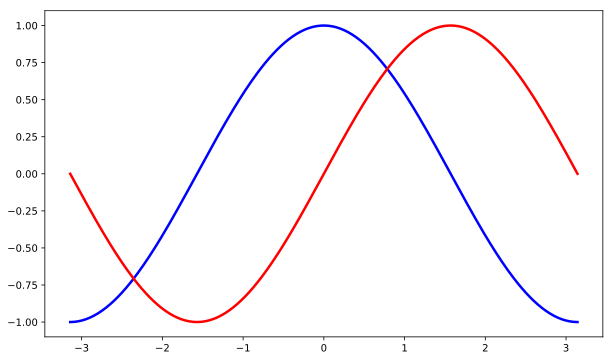

In [99]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")

## Setting limits

Current limits of the figure are a bit too tight and we want to make some space
in order to clearly see all data points. 

We can use:

```python
plt.xlim(...)
```
and

```python
plt.ylim(...)
```



Documentation

* [xlim()
command](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xlim)
* [ylim()
command](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.ylim)

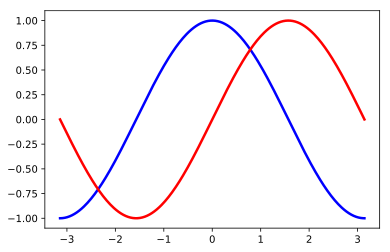

In [100]:
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")
plt.xlim(X.min() * 1.1, X.max() * 1.1)
plt.ylim(C.min() * 1.1, C.max() * 1.1)
plt.show()

## Setting ticks

Current ticks are not ideal because they do not show the interesting values for
sine and cosine. We'll change them such that they show only these values.

We can use the functions:
```python
plt.xticks(...)

```

and 
```python
plt.yticks(...)

```
Documentation

* [xticks()
command](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xticks)
* [yticks()
command](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.yticks)
* [Tick container](http://matplotlib.org/users/artists.html#axis-container)
* [Tick locating and formatting](http://matplotlib.org/api/ticker_api.html)


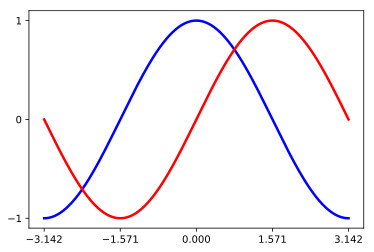

In [101]:
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")
plt.xlim(X.min() * 1.1, X.max() * 1.1)
plt.ylim(C.min() * 1.1, C.max() * 1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])

plt.show()

## Setting tick labels

Ticks are now properly placed but their label is not very explicit. We could
guess that `3.142` is $\pi$ but it would be better to make it explicit. When we
set tick values, we can also provide a corresponding label in the second
argument list. Note that we'll use latex to allow for nice rendering of the
label.

Documentation

* [Working with text](http://matplotlib.org/users/index_text.html)
* [xticks()
command](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xticks)
* [yticks()
command](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.yticks)
* [set\_xticklabels()](http://matplotlib.org/api/axes_api.html?#matplotlib.axes.
Axes.set_xticklabels)
* [set\_yticklabels()](http://matplotlib.org/api/axes_api.html?#matplotlib.axes.
Axes.set_yticklabels)


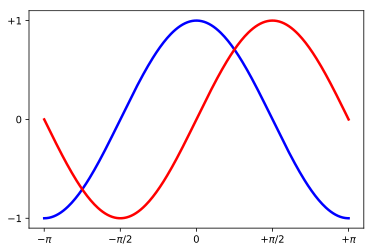

In [105]:
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")
plt.xlim(X.min() * 1.1, X.max() * 1.1)
plt.ylim(C.min() * 1.1, C.max() * 1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
          [r'$-1$', r'$0$', r'$+1$'])

plt.show()

## Moving spines

Spines are the lines connecting the axis tick marks and noting the boundaries of
the data area. They can be placed at arbitrary positions and until now, they
were on the border of the axis. We'll change that since we want to have them in
the middle. Since there are four of them (top/bottom/left/right), we'll discard
the top and right by setting their color to none and we'll move the bottom and
left ones to coordinate 0 in data space coordinates.

Documentation

* [Spines](http://matplotlib.org/api/spines_api.html#matplotlib.spines)
* [Axis container](http://matplotlib.org/users/artists.html#axis-container)
* [Transformations
tutorial](http://matplotlib.org/users/transforms_tutorial.html)

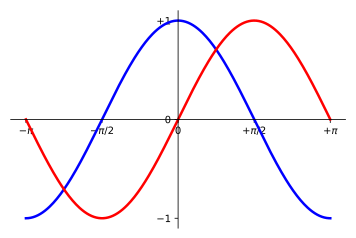

In [106]:
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")
plt.xlim(X.min() * 1.1, X.max() * 1.1)
plt.ylim(C.min() * 1.1, C.max() * 1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
          [r'$-1$', r'$0$', r'$+1$'])

# new code
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.savefig('../Data/11-fig/plot_spines.png')
plt.show()

![image](../Data/11-fig/plot_spines.png)

## Adding a legend

Let's add a legend in the upper left corner. This only requires adding the
keyword argument label (that will be used in the legend box) to the plot
commands.

```python
# new code
plt.legend(loc='upper left')

plt.show()
```

Documentation

* [Legend guide](http://matplotlib.org/users/legend_guide.html)
* [legend()
command](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend)
* [Legend
API](http://matplotlib.org/api/legend_api.html#matplotlib.legend.Legend)

![image](../Data/11-fig/plot_spines.png)

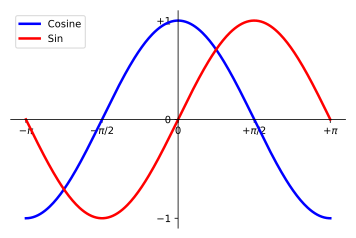

In [126]:
plt.plot(X, C, label = 'Cosine', color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, label= 'Sin',color="red",  linewidth=2.5, linestyle="-")
plt.xlim(X.min() * 1.1, X.max() * 1.1)
plt.ylim(C.min() * 1.1, C.max() * 1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
          [r'$-1$', r'$0$', r'$+1$'])

# new code
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.legend(loc='upper left')
plt.savefig('../Data/11-fig/plot_spines.png')

## Annotate some points

Let's annotate some interesting points using the annotate command. We chose the
$2\ pi /3$ value and we want to annotate both the sine and the cosine. We'll
first
draw a marker on the curve as well as a straight dotted line. Then, we'll use
the annotate command to display some text with an arrow.


Documentation

* [Annotating axis](http://matplotlib.org/users/annotations_guide.html)
* [annotate()
command](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate)

![image](../Data/11-fig/plotex.png)

```python
# new code

t = 2 * np.pi / 3
plt.plot([t, t], [0, np.cos(t)], color='blue', linewidth=2.5, linestyle="--")
plt.scatter([t, ], [np.cos(t), ], 50, color='blue')

plt.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t, t],[0, np.sin(t)], color='red', linewidth=2.5, linestyle="--")
plt.scatter([t, ],[np.sin(t), ], 50, color='red')

plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.savefig("../Data/11-fig/plotex.png", dpi=72) ```


# Other Types of Plots
## Examples

#### See: <http://matplotlib.org/gallery.html>

#### Helpful link:
[Matplotlib cheatsheet] [mpcs]

[mpcs]: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf



![image](../Data/11-fig/plot_plot_1.png)



![image](../Data/11-fig/plot_bar_1.png)

![image](../Data/11-fig/plot_contour_1.png)

![image](../Data/11-fig/plot_imshow_1.png)

![image](../Data/11-fig/plot_quiver_1.png)

![image](../Data/11-fig/plot_pie_1.png)

![image](../Data/11-fig/plot_grid_1.png)

![image](../Data/11-fig/plot_multiplot_1.png)

![image](../Data/11-fig/plot_polar_1.png)

![image](../Data/11-fig/plot_plot3d_1.png)

![image](../Data/11-fig/plot_text_1.png)

## Attribution

This notebook draws heavily on the Matplotlib lecture from the open
source [Scipy Lecture Notes][scipy-lec-notes] by Nicolas Rougier, Mike Müller,
and Gaël Varoquaux.  Bill Wing and Christoph Deil contributed review and
corrections.

[scipy-lec-notes]: http://www.scipy-lectures.org/